In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/Alvaro/Desktop/Alvaro/Scripts/Portfolio/Bank Churn/Bank+Customer+Churn/Bank_Churn.csv')


In [97]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Summary statistics
print(df.describe())


Dataset contains 10000 rows and 13 columns.
         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654     

In [98]:
# Check for missing values
print(df.isnull().sum())


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


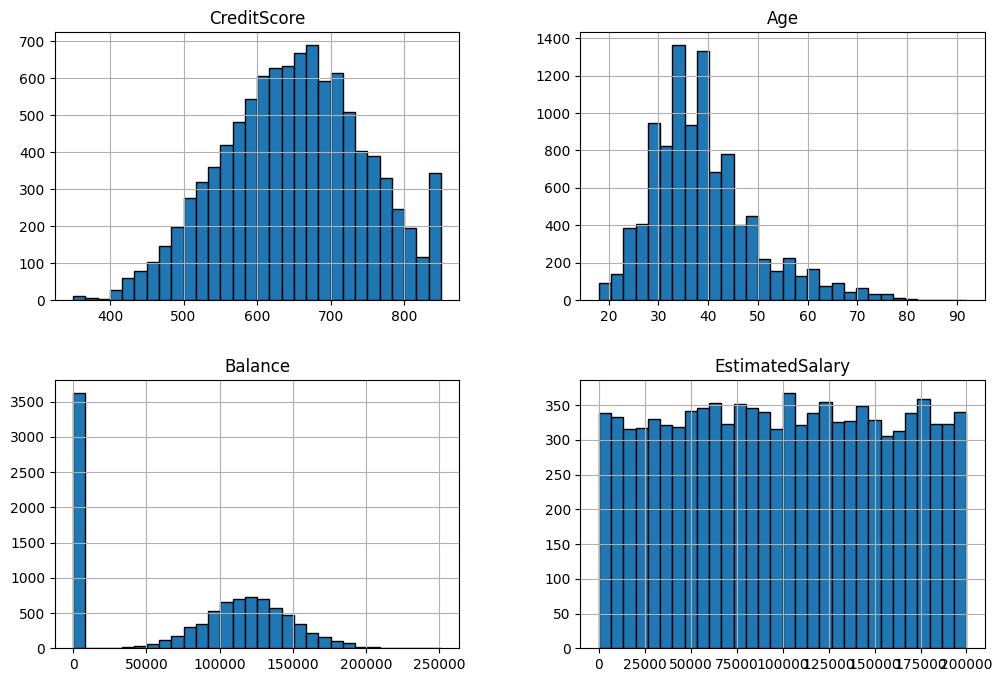

In [99]:
continuous_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df[continuous_vars].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.show()

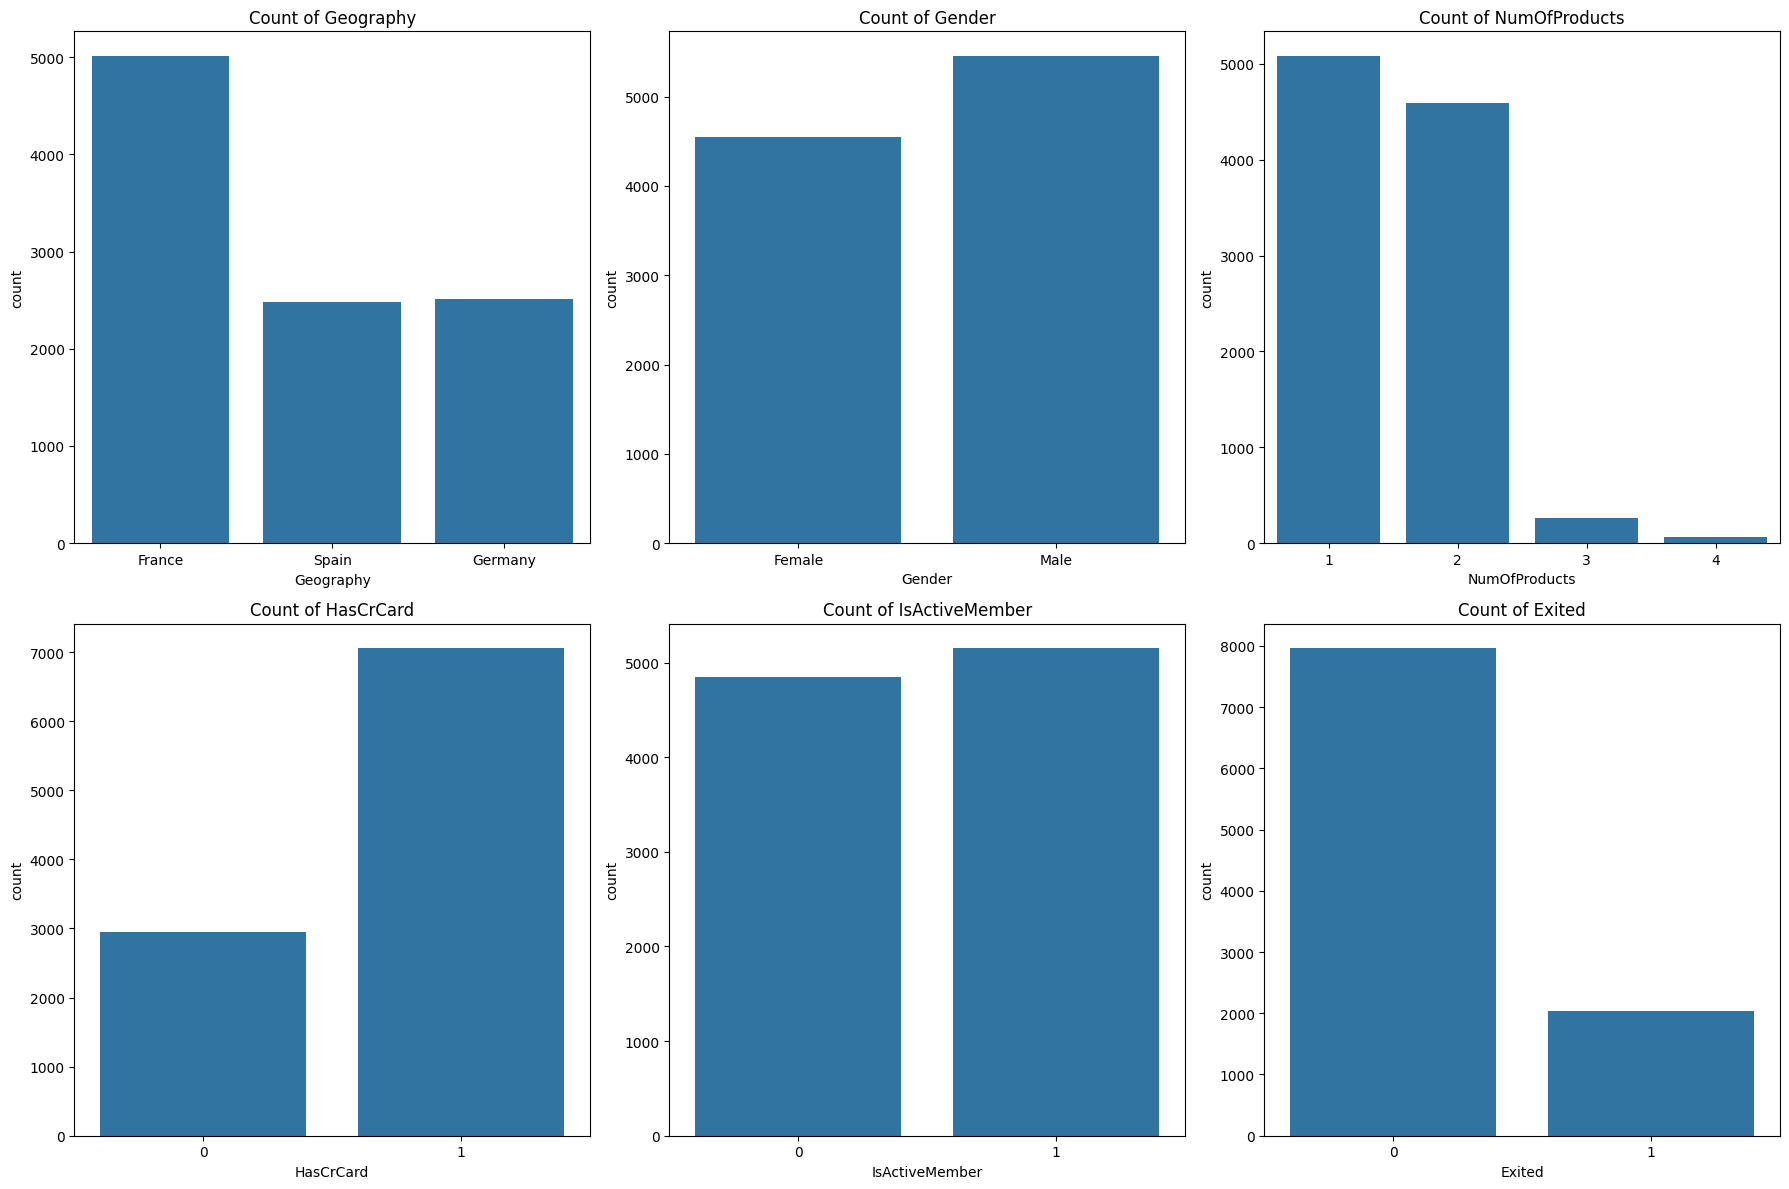

In [100]:
# Plot categorical variables
categorical_vars = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Count of {var}")
plt.tight_layout()
plt.show()


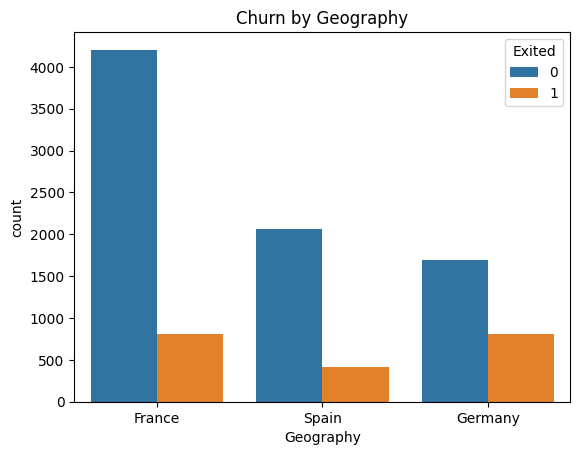

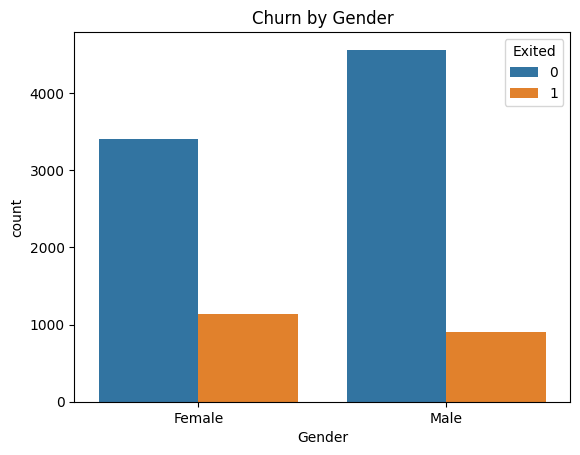

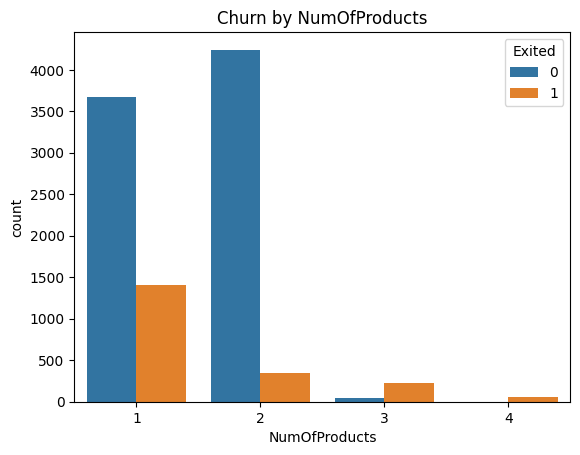

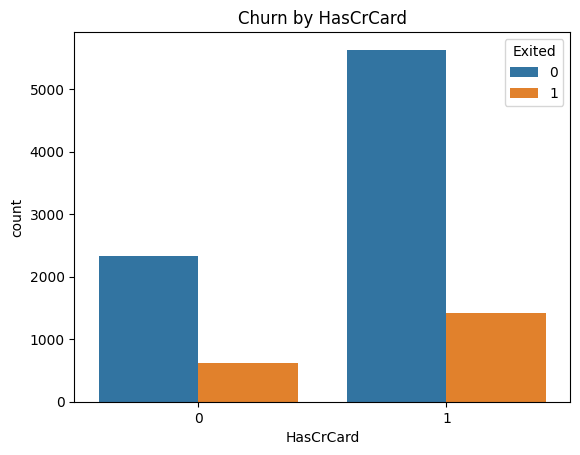

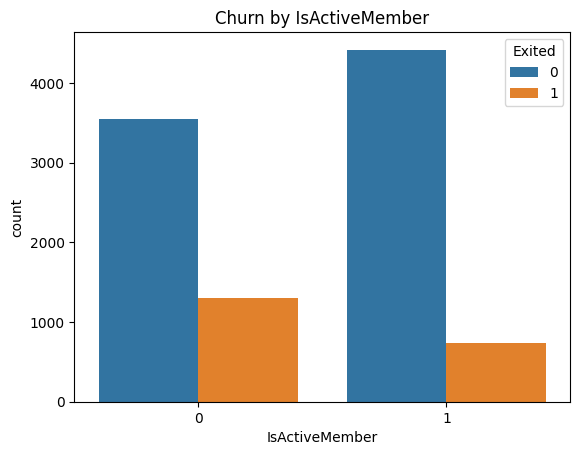

In [101]:
for var in ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    sns.countplot(x=var, hue='Exited', data=df)
    plt.title(f"Churn by {var}")
    plt.show()

In [102]:
# Define continuous variables
continuous_vars = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
continuous_vars = sm.add_constant(continuous_vars)
y = df['Exited']

# Fit the logistic regression model
model = sm.Logit(y, continuous_vars)
result = model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.460098
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                 0.08980
Time:                        00:23:46   Log-Likelihood:                -4601.0
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                3.379e-195
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.9269      0.212    -18.551      0.000      -4.342      -3.512
CreditScore   

In [103]:
print(df['Exited'].nunique())

2


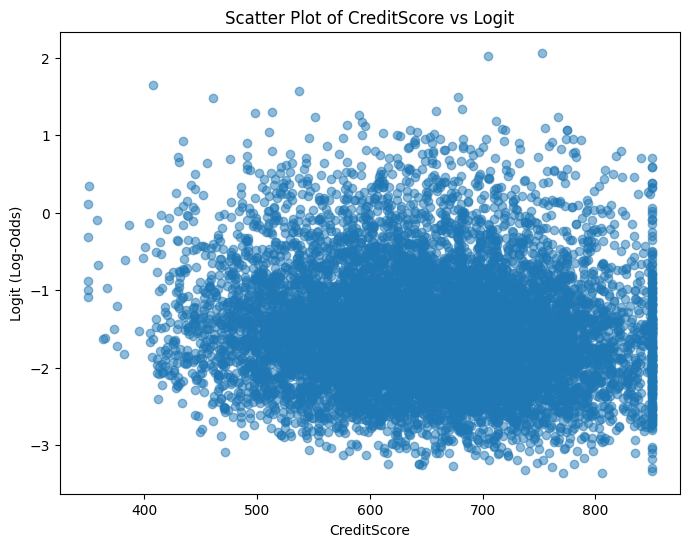

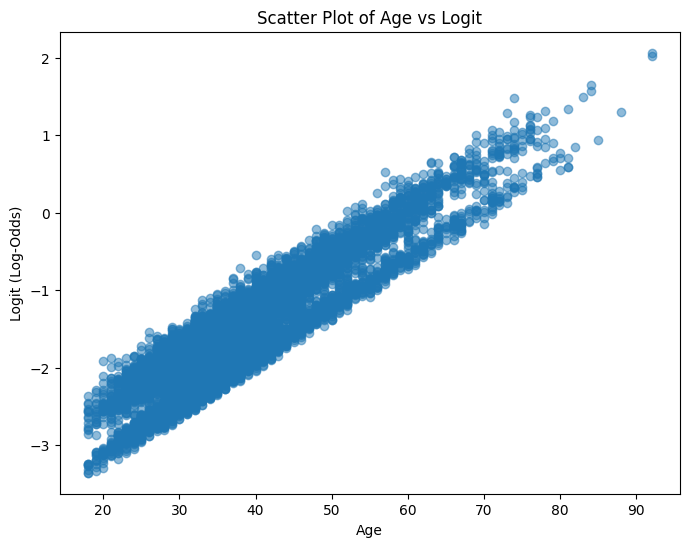

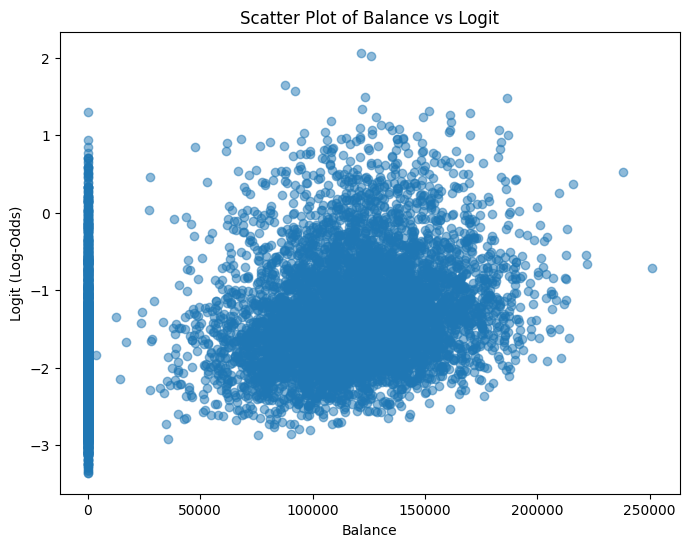

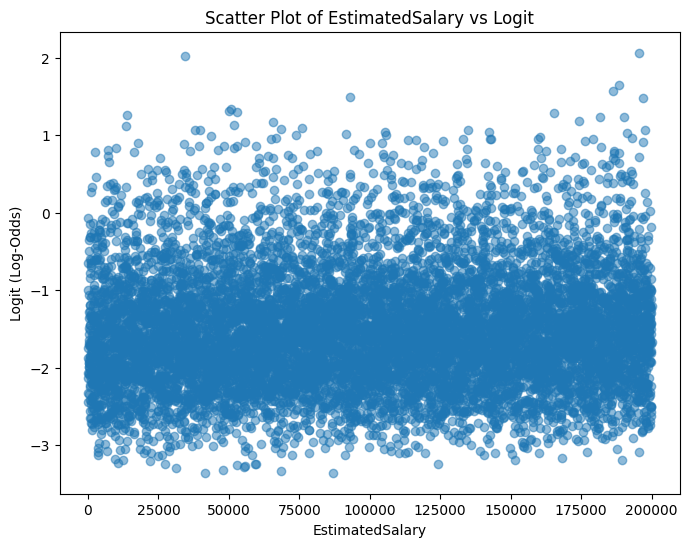

In [104]:
# Calculate the predicted probabilities
predicted_probs = result.predict(continuous_vars)

# Convert predicted probabilities to logit values (log-odds)
logit_values = np.log(predicted_probs / (1 - predicted_probs))

# Create scatter plots for each continuous predictor against the logit values
for column in continuous_vars.columns[1:]:  # Skip the constant term
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], logit_values, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Logit (Log-Odds)')
    plt.title(f'Scatter Plot of {column} vs Logit')
    plt.show()

In [105]:
# Apply log transformation to non-linear variables
df['log_CreditScore'] = np.log(df['CreditScore'] + 1)  # Add 1 to avoid log(0)
df['log_Balance'] = np.log(df['Balance'] + 1)
df['log_EstimatedSalary'] = np.log(df['EstimatedSalary'] + 1)

In [106]:
# Define continuous variables
transformed_vars = df[['log_CreditScore', 'log_Balance', 'log_EstimatedSalary']]
transformed_vars = sm.add_constant(transformed_vars)
y = df['Exited']

# Fit the logistic regression model
model = sm.Logit(y, transformed_vars)
result = model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.497108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                 0.01658
Time:                        00:23:47   Log-Likelihood:                -4971.1
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                 4.160e-36
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3375      1.087      1.230      0.219      -0.793       3.468
lo

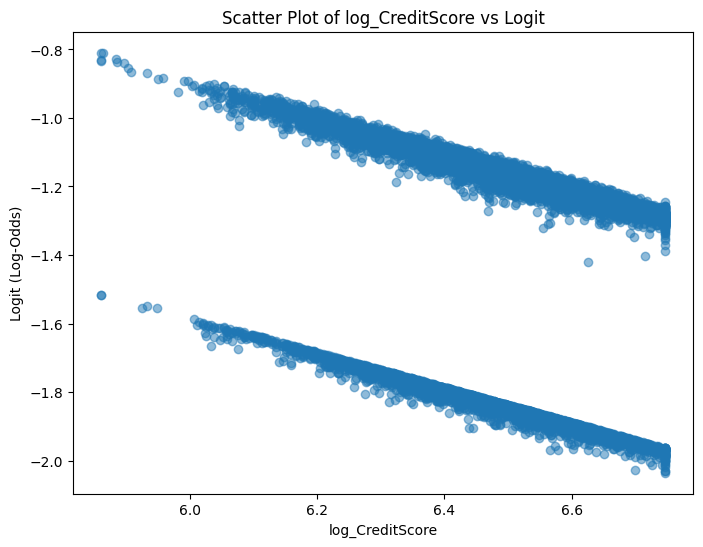

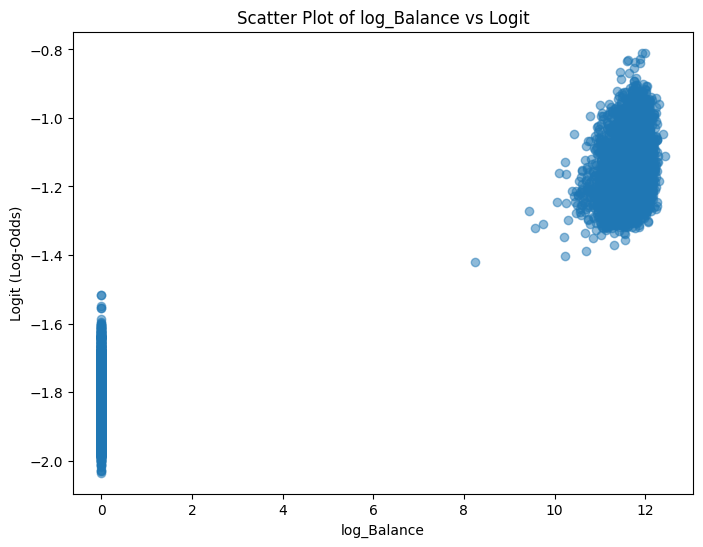

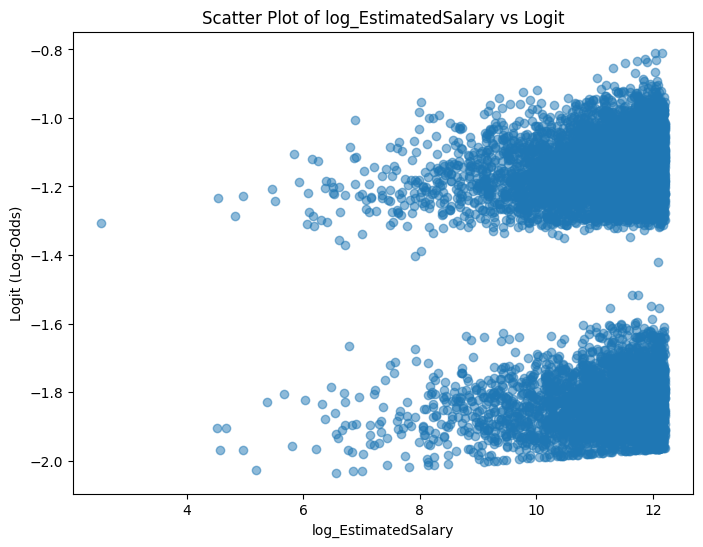

In [107]:
# Calculate the predicted probabilities
predicted_probs = result.predict(transformed_vars)

# Convert predicted probabilities to logit values (log-odds)
logit_values = np.log(predicted_probs / (1 - predicted_probs))

# Create scatter plots for each continuous predictor against the logit values
for column in transformed_vars.columns[1:]:  # Skip the constant term
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], logit_values, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Logit (Log-Odds)')
    plt.title(f'Scatter Plot of {column} vs Logit')
    plt.show()

In [108]:
df['sqrt_Balance'] = np.sqrt(df['Balance'])
df['sqrt_EstimatedSalary'] = np.sqrt(df['EstimatedSalary'])

In [109]:
# Define continuous variables
transformed_sqrt_vars = df[['sqrt_Balance', 'sqrt_EstimatedSalary']]
transformed_sqrt_vars = sm.add_constant(transformed_sqrt_vars)
y = df['Exited']

# Fit the logistic regression model
model = sm.Logit(y, transformed_sqrt_vars)
result = model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.497696
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                 0.01542
Time:                        00:23:47   Log-Likelihood:                -4977.0
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                 1.422e-34
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8741      0.085    -21.949      0.000      -2.041      -1.707

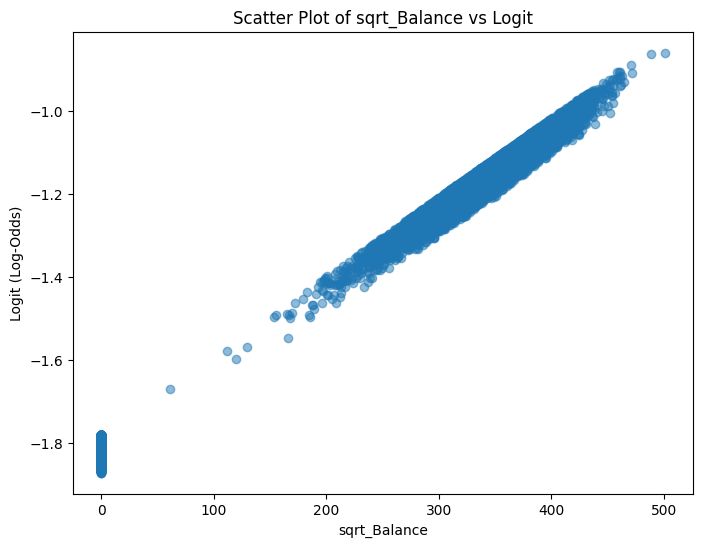

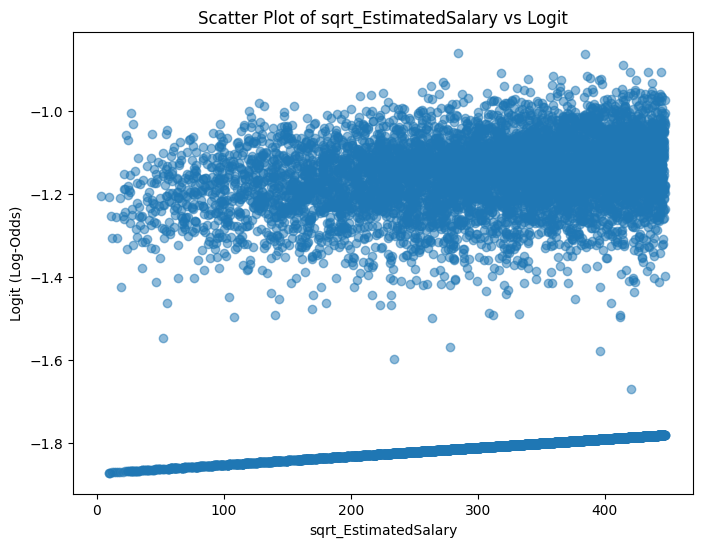

In [110]:
# Calculate the predicted probabilities
predicted_probs = result.predict(transformed_sqrt_vars)

# Convert predicted probabilities to logit values (log-odds)
logit_values = np.log(predicted_probs / (1 - predicted_probs))

# Create scatter plots for each continuous predictor against the logit values
for column in transformed_sqrt_vars.columns[1:]:  # Skip the constant term
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], logit_values, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Logit (Log-Odds)')
    plt.title(f'Scatter Plot of {column} vs Logit')
    plt.show()

In [111]:
df['EstimatedSalary_squared'] = df['EstimatedSalary'] ** 2

In [112]:
# Define continuous variables
transformed_squared_vars = df[['EstimatedSalary_squared']]
transformed_squared_vars = sm.add_constant(transformed_squared_vars)
y = df['Exited']

# Fit the logistic regression model
model = sm.Logit(y, transformed_squared_vars)
result = model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.505396
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:               0.0001848
Time:                        00:23:49   Log-Likelihood:                -5054.0
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                    0.1717
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.4015      0.038    -37.356      0.000      -1.475   

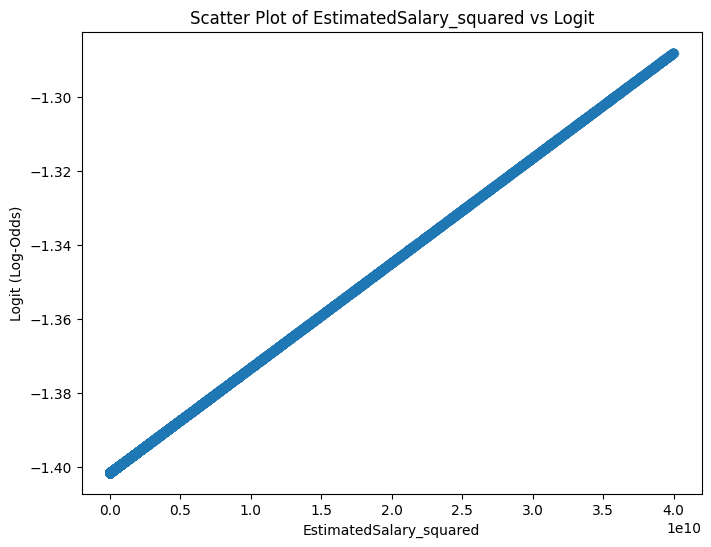

In [113]:
# Calculate the predicted probabilities
predicted_probs = result.predict(transformed_squared_vars)

# Convert predicted probabilities to logit values (log-odds)
logit_values = np.log(predicted_probs / (1 - predicted_probs))

# Create scatter plots for each continuous predictor against the logit values
for column in transformed_squared_vars.columns[1:]:  # Skip the constant term
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], logit_values, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Logit (Log-Odds)')
    plt.title(f'Scatter Plot of {column} vs Logit')
    plt.show()

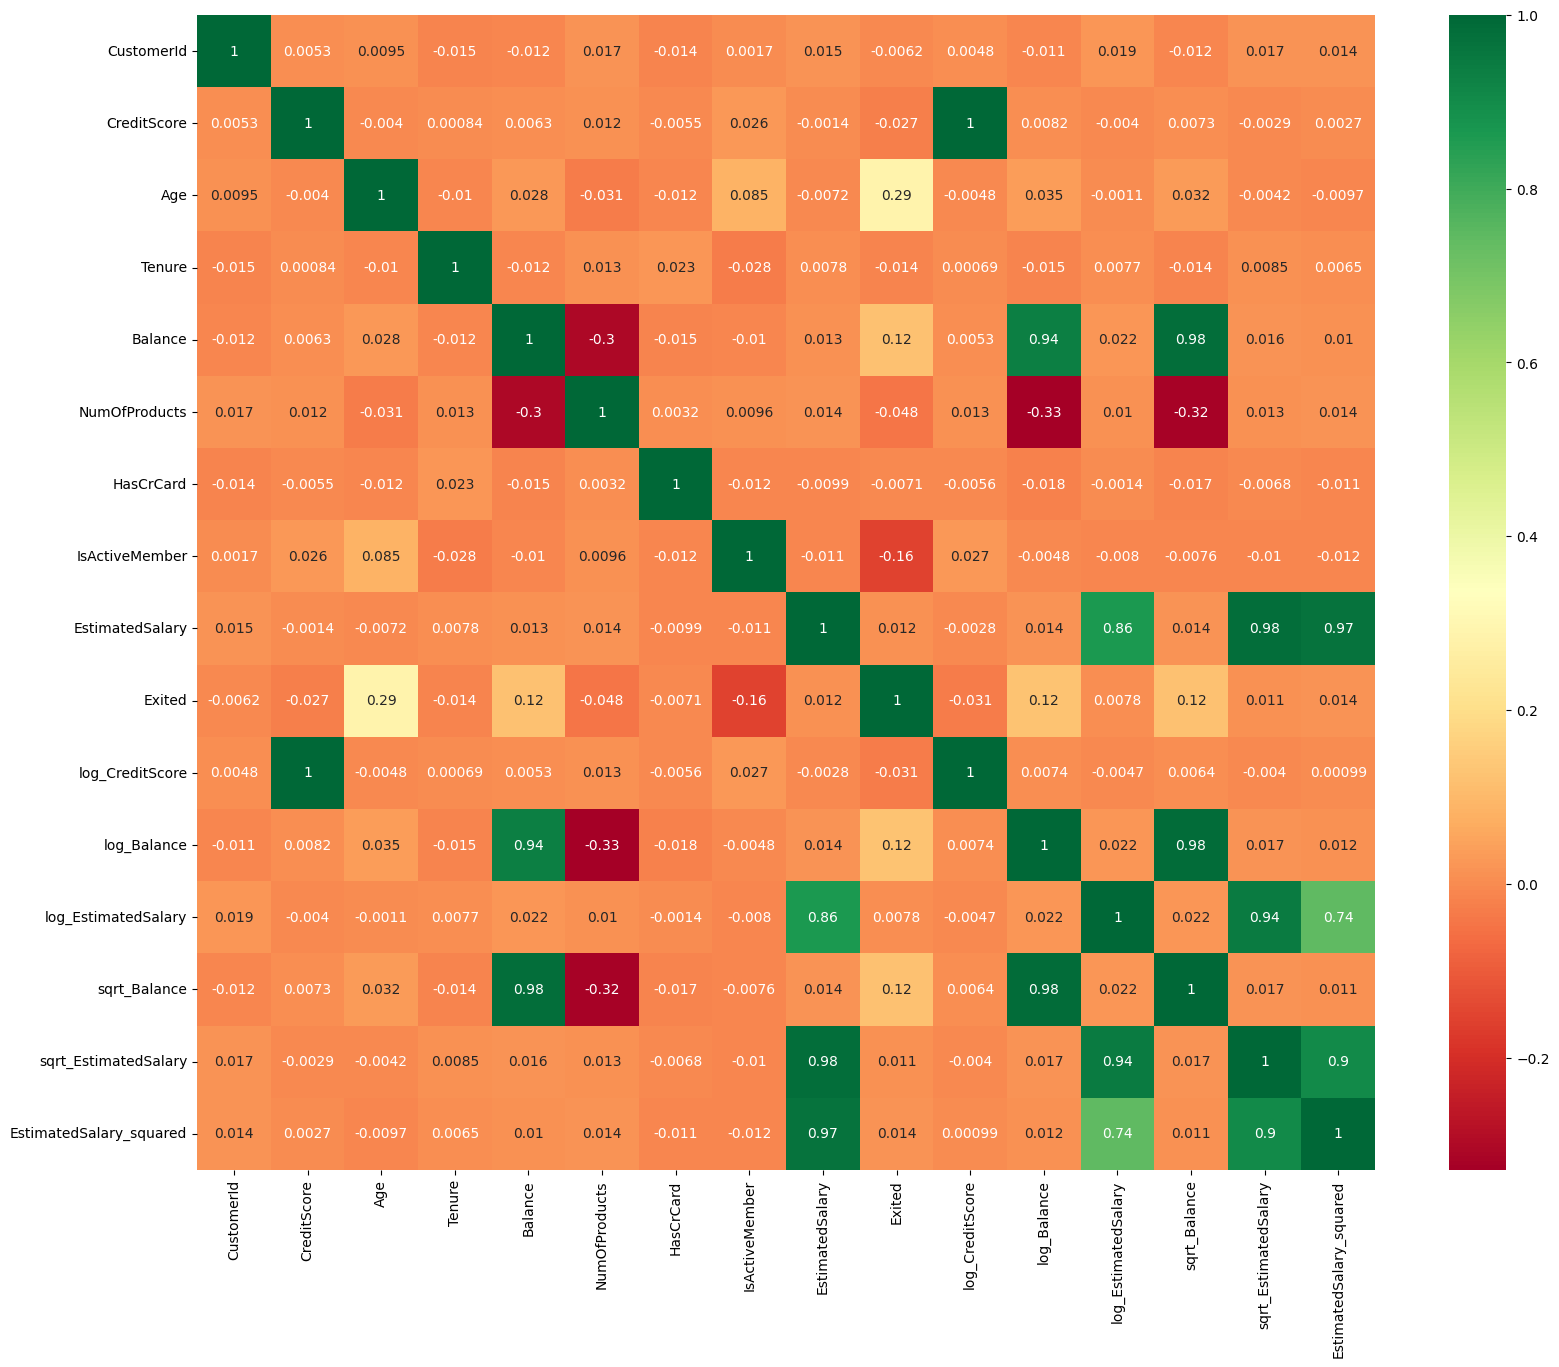

In [115]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corrMatrix = numeric_df.corr()

# Plot the heatmap
plt.subplots(figsize=(19, 15))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

In [119]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(linearized_variables.values, i) for i in range(linearized_variables.shape[1])]
vif['Variable'] = linearized_variables.columns
print(vif)

        VIF                 Variable
0  0.000000                    const
1  1.001154                      Age
2  1.000067          log_CreditScore
3  1.001209             sqrt_Balance
4  1.000233  EstimatedSalary_squared


c:\Users\Alvaro\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


      CustomerId   cooks_d
6443    15764927  0.003055
6759    15660878  0.002526
3387    15798024  0.002017
2458    15813303  0.001919
9292    15677764  0.001810
9210    15792650  0.001733
3490    15809137  0.001642
1193    15779947  0.001573
2579    15597896  0.001481
9356    15734711  0.001446


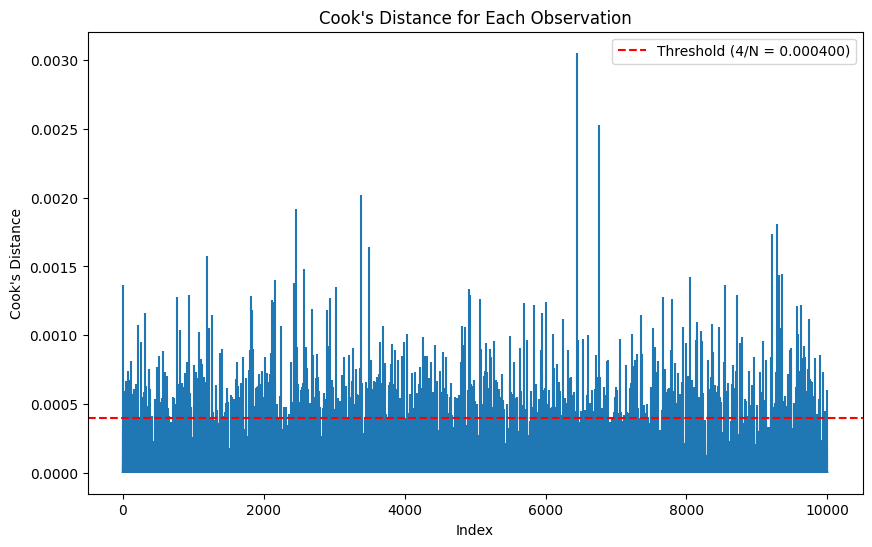

In [122]:
# Calculate Cook's distance
influence = result.get_influence()
cooks_d = influence.cooks_distance[0]

# Add Cook's distance to DataFrame for inspection
df['cooks_d'] = cooks_d

# Inspect Cook's distance
print(df[['CustomerId', 'cooks_d']].sort_values(by='cooks_d', ascending=False).head(10))

# Define the threshold for Cook's distance
N = len(df)
threshold = 4 / N

plt.figure(figsize=(10, 6))
plt.stem(df.index, cooks_d, markerfmt=" ", basefmt=" ")
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold (4/N = {threshold:.6f})')
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.legend()
plt.show()

In [114]:
# Define continuous variables
linearized_variables = df[['Age', 'log_CreditScore', 'sqrt_Balance', 'EstimatedSalary_squared']]
linearized_variables = sm.add_constant(linearized_variables)
y = df['Exited']

# Fit the logistic regression model
model = sm.Logit(y, linearized_variables)
result = model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459471
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                 0.09104
Time:                        00:23:50   Log-Likelihood:                -4594.7
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                6.458e-198
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.9737      1.098     -0.887      0.375      -3.126   

In [61]:
# Define categorical variables
categorical_vars = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure']

# Perform Chi-Square test for each categorical variable
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{var}: p-value = {p}")
    print(f"Chi2 Statistic: {chi2}")
    print(expected)

Geography: p-value = 3.8303176053541544e-66
Chi2 Statistic: 301.25533682434536
[[3992.6482 1021.3518]
 [1997.9167  511.0833]
 [1972.4351  504.5649]]
Gender: p-value = 2.2482100097131755e-26
Chi2 Statistic: 112.91857062096116
[[3617.5909  925.4091]
 [4345.4091 1111.5909]]
NumOfProducts: p-value = 0.0
Chi2 Statistic: 1503.6293615070408
[[4048.3892 1035.6108]
 [3655.017   934.983 ]
 [ 211.8158   54.1842]
 [  47.778    12.222 ]]
HasCrCard: p-value = 0.49237236141554697
Chi2 Statistic: 0.47133779904440803
[[2345.1035  599.8965]
 [5617.8965 1437.1035]]
IsActiveMember: p-value = 8.785858269303705e-55
Chi2 Statistic: 242.98534164287963
[[3861.2587  987.7413]
 [4101.7413 1049.2587]]
Tenure: p-value = 0.17758462026413294
Chi2 Statistic: 13.900372600390284
[[328.8719  84.1281]
 [824.1705 210.8295]
 [834.5224 213.4776]
 [803.4667 205.5333]
 [787.5407 201.4593]
 [805.8556 206.1444]
 [770.0221 196.9779]
 [818.5964 209.4036]
 [816.2075 208.7925]
 [783.5592 200.4408]
 [390.187   99.813 ]]
